In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## 
Exploratory Data Analysis (EDA):

1.	Load the Titanic dataset using Python's pandas library.

2.	Check for missing values.

3.	Explore data distributions using histograms and box plots.

4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [2]:
df1 = pd.read_csv('Titanic_train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df2 = pd.read_csv('Titanic_test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
df = pd.concat([df1,df2],axis=0)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [25]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [26]:
df['Survived']= df['Survived'].fillna(df['Survived'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [27]:
sex = pd.get_dummies(df['Sex'], drop_first=True, dtype='int')
embark = pd.get_dummies(df['Embarked'], drop_first=True, dtype='int')

In [28]:
df.drop(['Sex','Name','Embarked','Ticket','Cabin','Fare'],axis=1,inplace=True)

In [29]:
df = pd.concat([df,sex,embark],axis=1)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0.000000,3,22.000000,1,0,1,0,1
1,2,1.000000,1,38.000000,1,0,0,0,0
2,3,1.000000,3,26.000000,0,0,0,0,1
3,4,1.000000,1,35.000000,1,0,0,0,1
4,5,0.000000,3,35.000000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,0.383838,3,29.881138,0,0,1,0,1
414,1306,0.383838,1,39.000000,0,0,0,0,0
415,1307,0.383838,3,38.500000,0,0,1,0,1
416,1308,0.383838,3,29.881138,0,0,1,0,1


In [30]:
df.duplicated().any()

False

<Axes: ylabel='Count'>

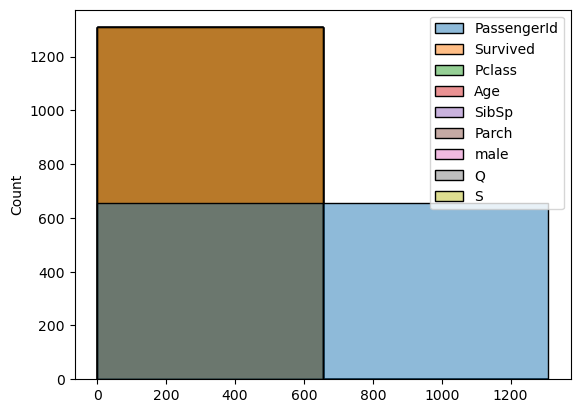

In [69]:
sns.histplot(df,bins=2)

<Axes: xlabel='Survived', ylabel='Count'>

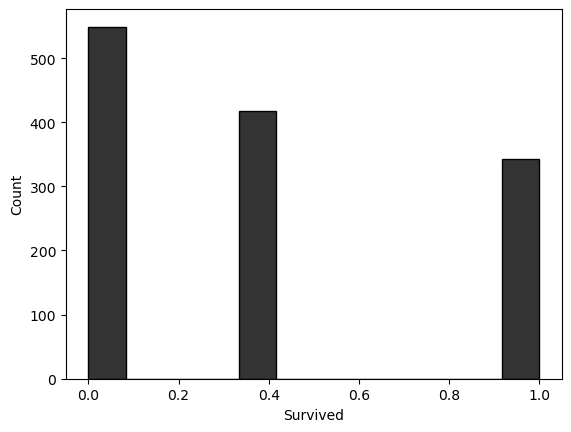

In [37]:
sns.histplot(df['Survived'],color='black',alpha=0.8)

<Axes: xlabel='Age', ylabel='Parch'>

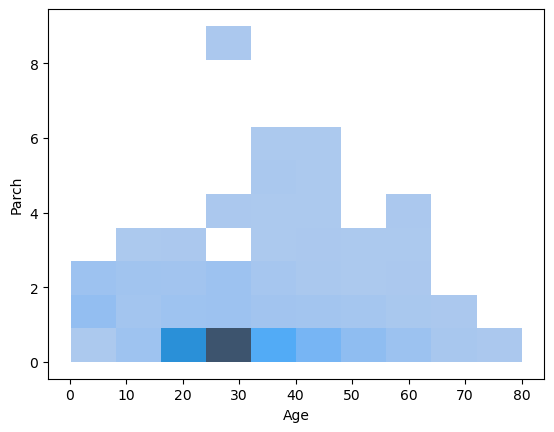

In [39]:
sns.histplot(data=df,x=df['Age'],y=df['Parch'],bins=10)

<Axes: xlabel='SibSp', ylabel='Pclass'>

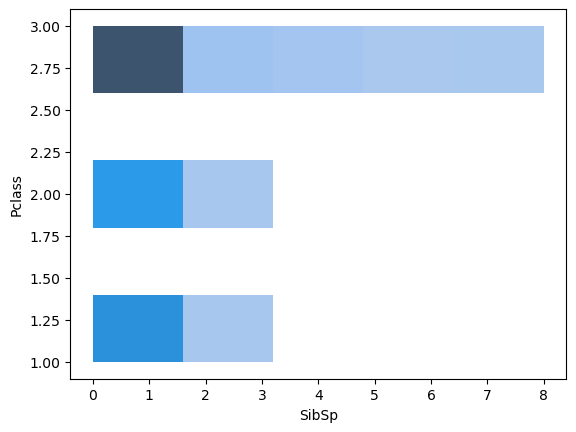

In [41]:
sns.histplot(data=df,x=df['SibSp'],y=df['Pclass'],bins=5)

<Axes: xlabel='Survived', ylabel='Pclass'>

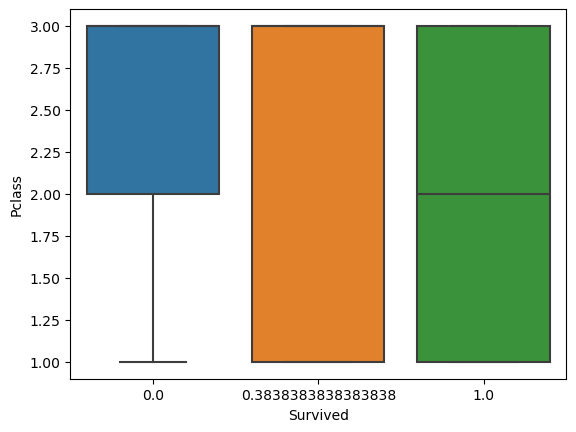

In [44]:
sns.boxplot(data=df,x='Survived',y='Pclass')

In [45]:
df.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0.0,3,22.0,1,0,1,0,1


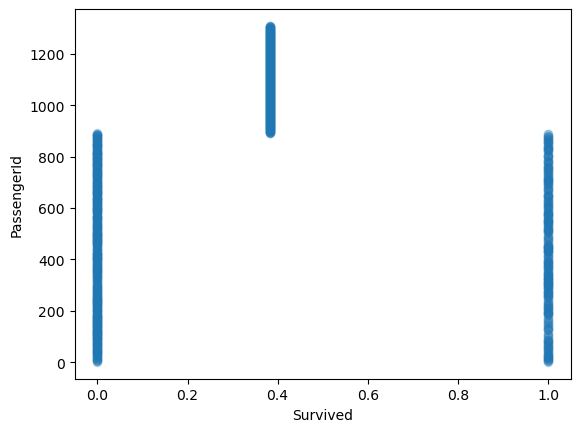

In [58]:
plt.scatter(df['Survived'],df['PassengerId'],alpha=0.2)
plt.xlabel('Survived')
plt.ylabel('PassengerId')
plt.show()

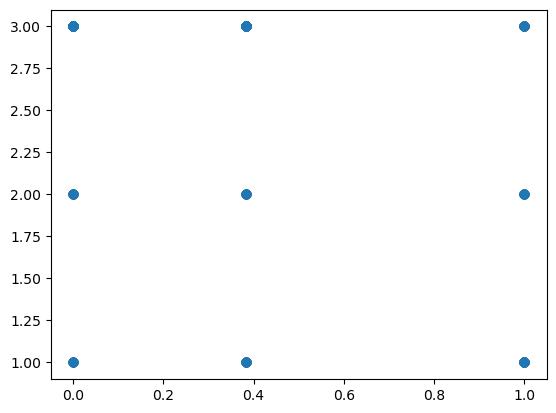

In [90]:
plt.scatter(df['Survived'],df['Pclass'],alpha=0.2)

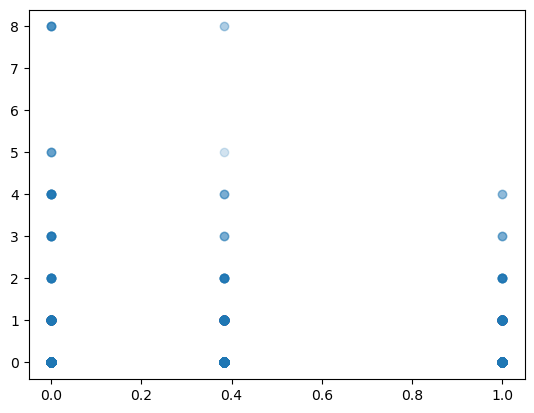

In [60]:
plt.scatter(df['Survived'],df['SibSp'],alpha=0.2)

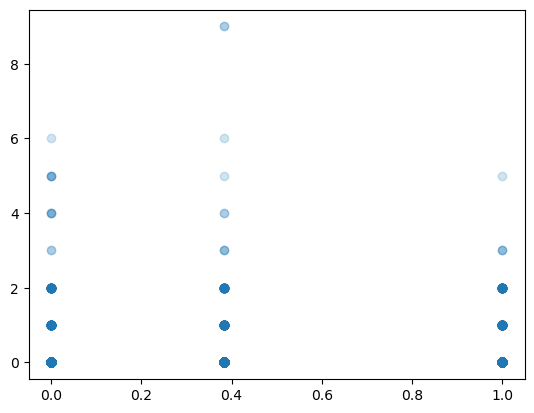

In [61]:
plt.scatter(df['Survived'],df['Parch'],alpha=0.2)

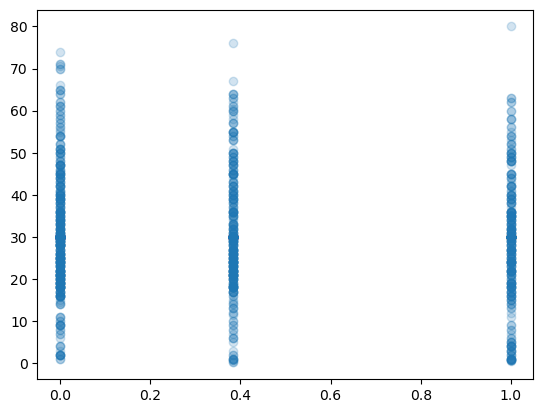

In [62]:
plt.scatter(df['Survived'],df['Age'],alpha=0.2)

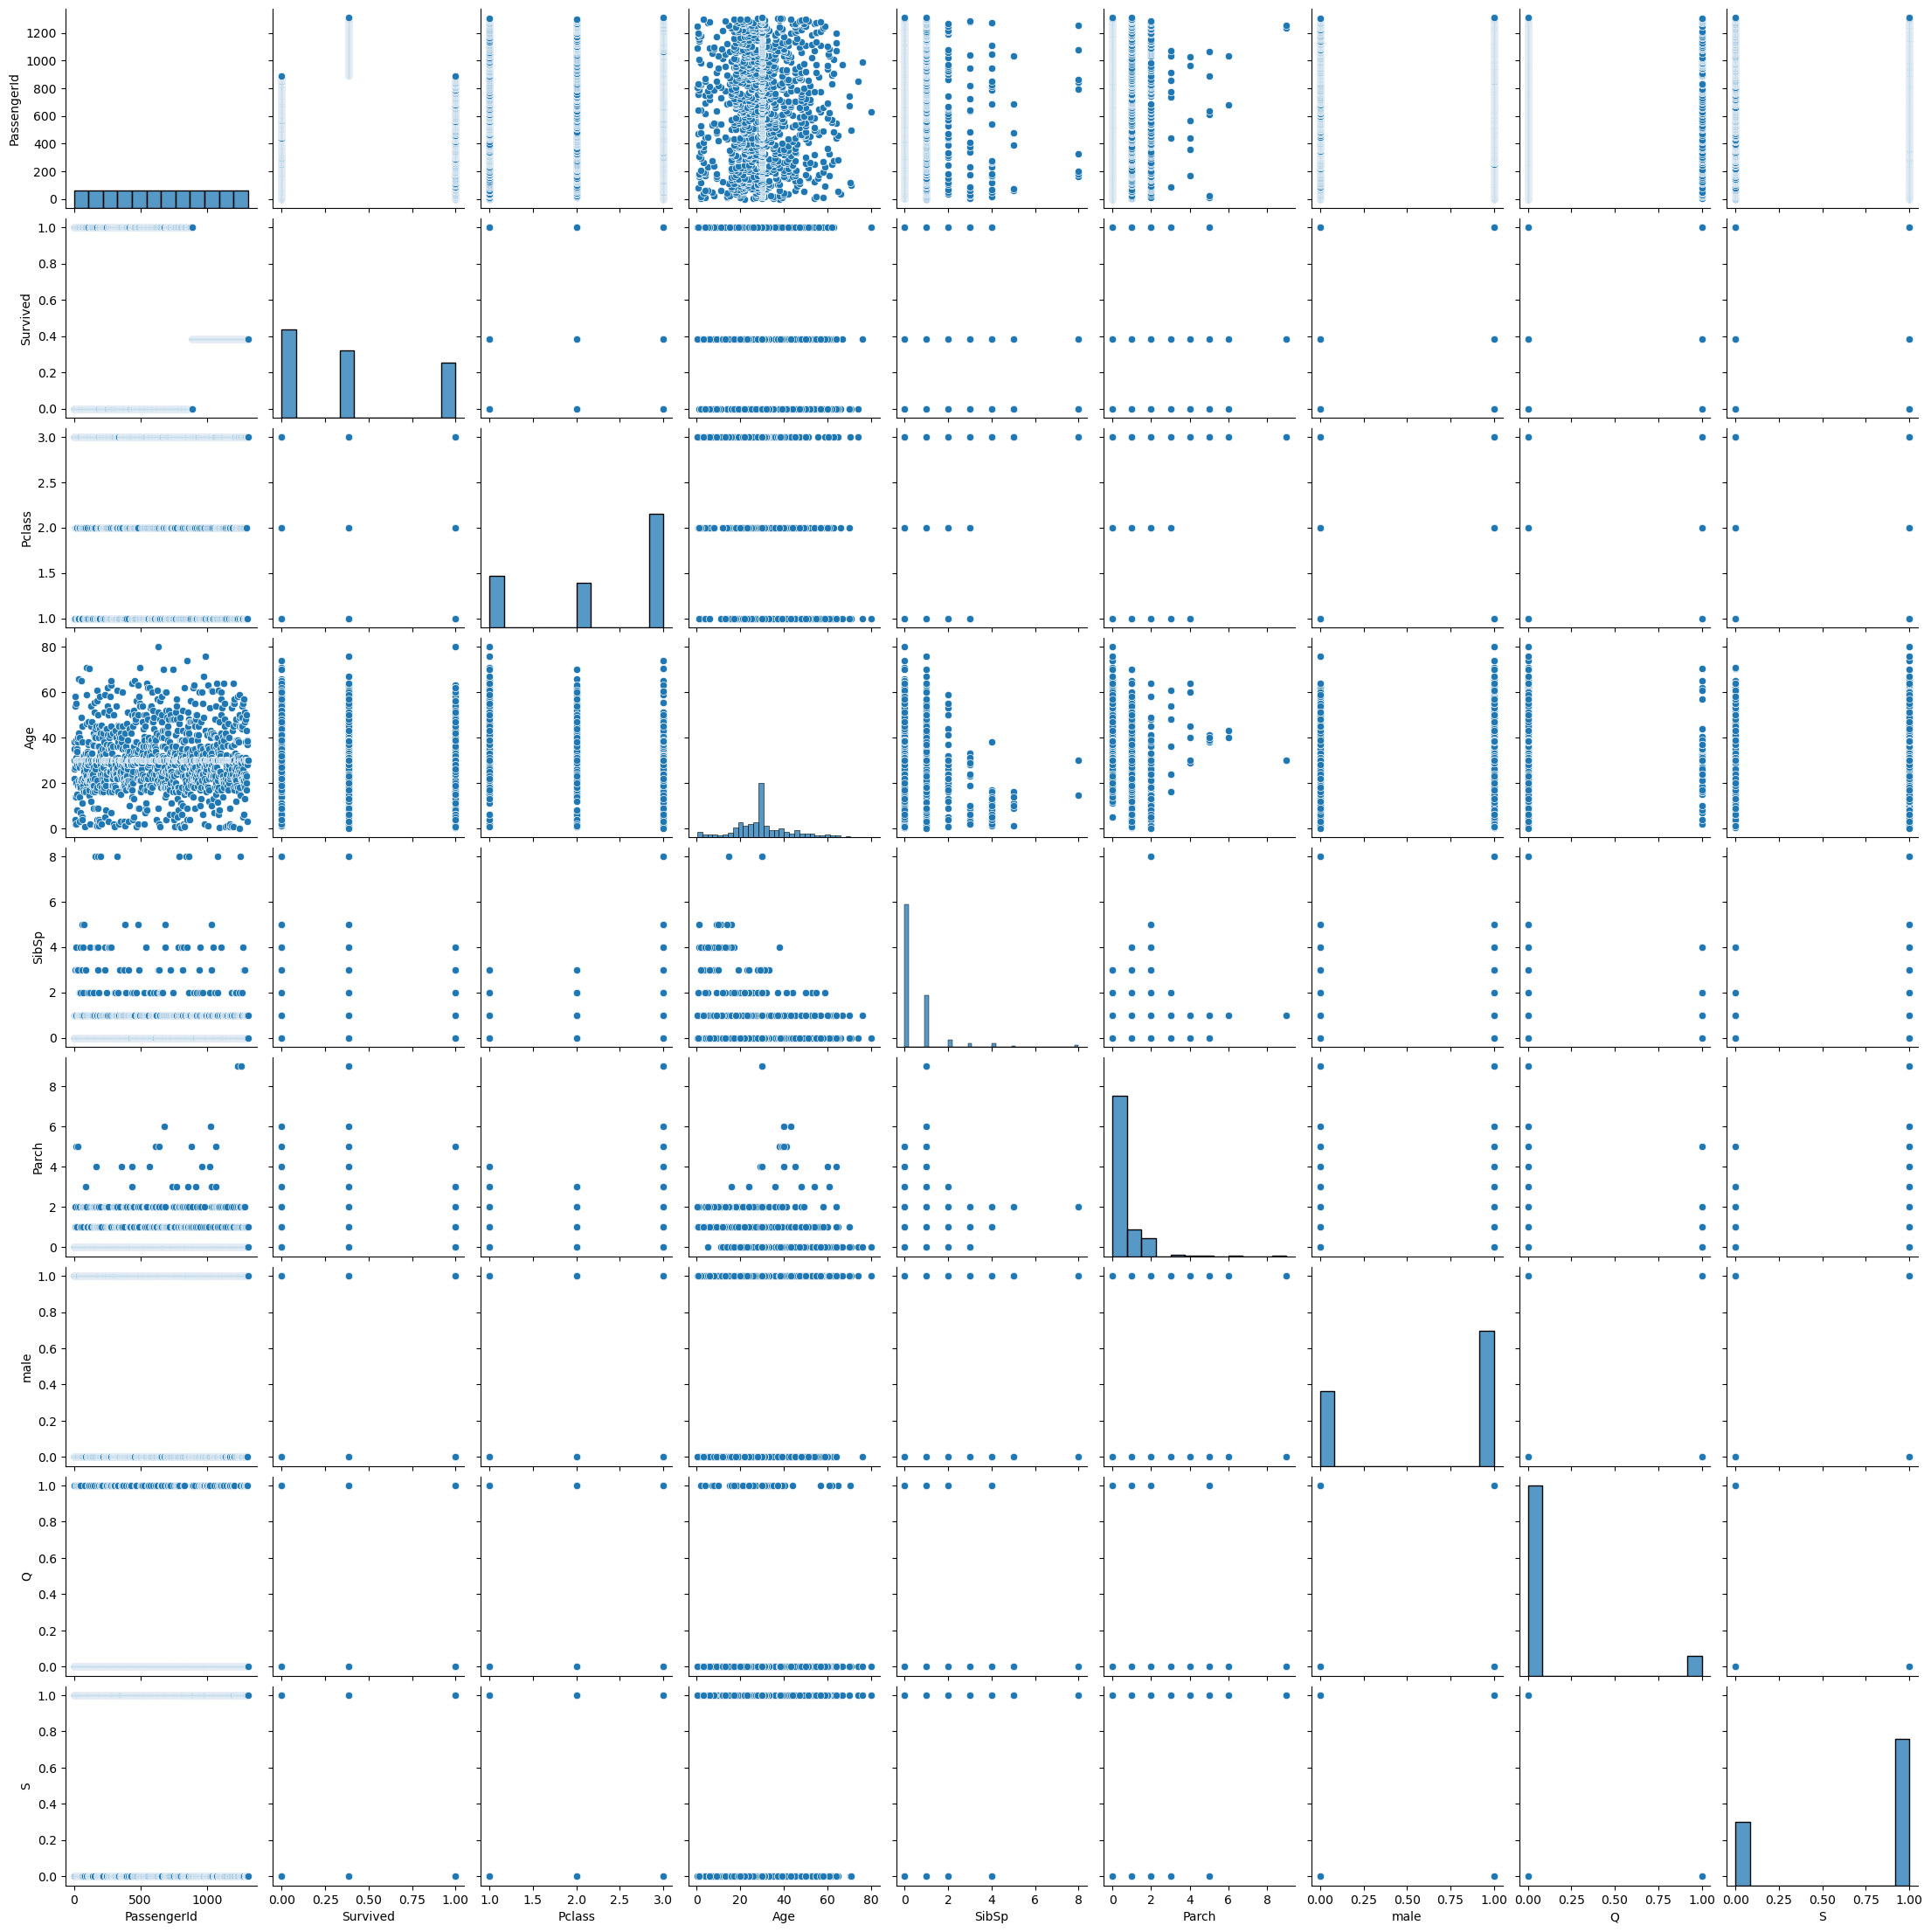

In [43]:
sns.pairplot(data = df)

<Axes: >

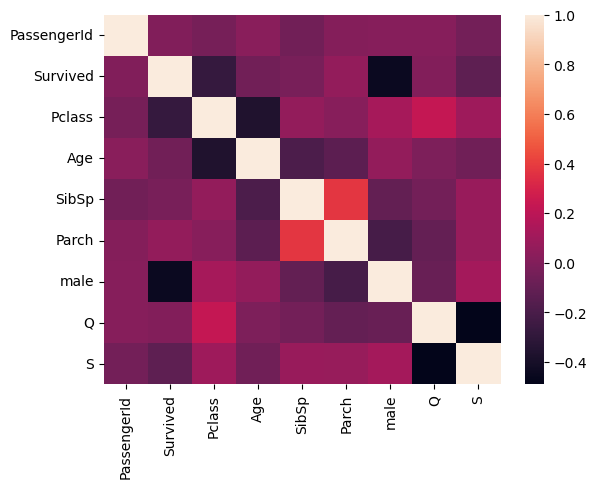

In [152]:
sns.heatmap(df.corr())

## 
Data Preprocessing:

1.	Impute missing values.

2.	Encode categorical variables using one-hot encoding or label encoding. 

3.	If needed you can apply more preprocessing methods on the given dataset.


In [70]:
from sklearn.impute import SimpleImputer

In [71]:
target = df['Survived']
feature = df.drop('Survived',axis=1)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

In [75]:
sim_impute = SimpleImputer()

In [76]:
x_train = sim_impute.fit_transform(x_train)
x_test = sim_impute.fit_transform(x_test)

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
lab_enc = LabelEncoder()

In [99]:
y_train = lab_enc.fit_transform(y_train)

## Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.

2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3.	Build predictive models using LightGBM and XGBoost algorithms.

4.	Train the models on the training set and evaluate their performance on the testing set.

5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


#### XGBOOSTING

In [119]:
import xgboost as xgb

In [120]:
xg_boost = xgb.XGBClassifier(n_estimator=50,learning_rate = 0.9)

In [121]:
xg_boost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=50, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [133]:
y_pred_xgb = xg_boost.predict(x_test)

In [134]:
accuracy_score(y_test,y_pred_xgb)

0.8384146341463414

In [108]:
params = {'n_estimator':[50,60,70,100,125,150],'learning_rate':[0.7,0.8,0.9]}

In [109]:
grid_search = GridSearchCV(xg_boost,params)

In [110]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.7, 0.8, 0.9],
                         'n_estimator': [50, 60, 70, 100, 125, 150]})

In [111]:
grid_search.best_params_

{'learning_rate': 0.9, 'n_estimator': 50}

In [135]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       151
           1       1.00      1.00      1.00        92
           2       0.72      0.62      0.67        85

    accuracy                           0.84       328
   macro avg       0.84      0.83      0.83       328
weighted avg       0.84      0.84      0.84       328



#### LGBM

In [126]:
import lightgbm as lgb

In [136]:
lg_boost = lgb.LGBMClassifier(n_estimators=50,learning_rate=0.9)

In [137]:
lg_boost.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 981, number of used features: 8
[LightGBM] [Info] Start training from score -0.902120
[LightGBM] [Info] Start training from score -1.101675
[LightGBM] [Info] Start training from score -1.339496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(learning_rate=0.9, n_estimators=50)

In [138]:
y_pred_lgb = lg_boost.predict(x_test)

In [139]:
accuracy_score(y_test,y_pred_lgb)

0.8384146341463414

In [141]:
params = {'n_estimators':[50,75,100,125,150],'learning_rate':[0.6,0.7,0.8,0.9,1]}

In [142]:
grid_search = GridSearchCV(lg_boost,params)

In [143]:
grid_search.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 8
[LightGBM] [Info] Start training from score -0.902358
[LightGBM] [Info] Start training from score -1.099889
[LightGBM] [Info] Start training from score -1.341399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

GridSearchCV(estimator=LGBMClassifier(learning_rate=0.9, n_estimators=50),
             param_grid={'learning_rate': [0.6, 0.7, 0.8, 0.9, 1],
                         'n_estimators': [50, 75, 100, 125, 150]})

In [144]:
grid_search.best_params_

{'learning_rate': 0.9, 'n_estimators': 50}

In [140]:
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       1.00      1.00      1.00        92
           2       0.73      0.60      0.66        85

    accuracy                           0.84       328
   macro avg       0.84      0.82      0.83       328
weighted avg       0.84      0.84      0.83       328



## 
Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [125]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       151
           1       1.00      1.00      1.00        92
           2       0.72      0.62      0.67        85

    accuracy                           0.84       328
   macro avg       0.84      0.83      0.83       328
weighted avg       0.84      0.84      0.84       328



In [145]:
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       151
           1       1.00      1.00      1.00        92
           2       0.73      0.60      0.66        85

    accuracy                           0.84       328
   macro avg       0.84      0.82      0.83       328
weighted avg       0.84      0.84      0.83       328



In [ ]:
sns.reegplot()

<Axes: >

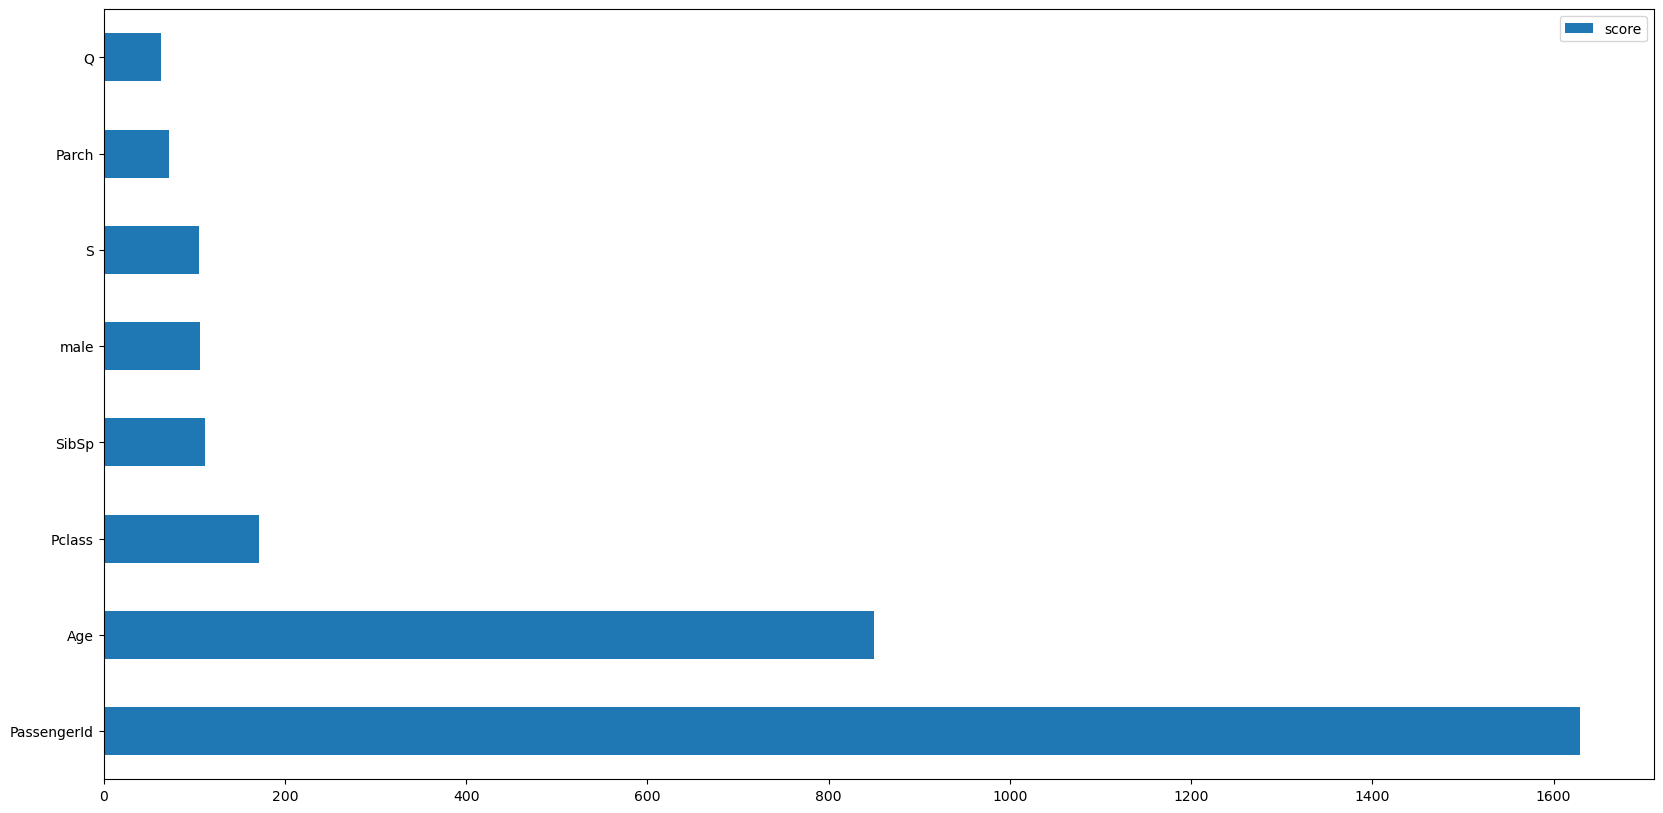

In [147]:
feature_important = xg_boost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))